# try doc2vec

In [1]:
# model = Doc2Vec(contentcutlist, size=100, window=8, min_count=5, workers=4)
import pandas as pd
import numpy as np
import jieba
#改為中文繁體字典,預設是簡體，可到jieba的GitHub下載
jieba.set_dictionary(r'D:\WordLibrary\JiebaUse\jieba_dict.txt.big') 
from wordcloud import WordCloud
import random
import json


In [2]:
with open(r"D:\Data\JsonData\TainanFood\bigtable_1.3.json") as f:
    BigAnalyzeTable=json.load(f)



In [3]:
def StopWdFilter(user_input, stop_words):
    """Sanitize using intersection and list.remove()"""
    # Downsides:
    #   - Looping over list while removing from it?
    #     http://stackoverflow.com/questions/1207406/remove-items-from-a-list-while-iterating-in-python
    stop_words = set()
    with open('D:/WordLibrary/JiebaUse/stopwords.txt', 'r', encoding='utf-8') as sw:
        for line in sw:
            stop_words.add(line.strip('\n'))
    for sw in stop_words.intersection(user_input):
        while sw in user_input:
            user_input.remove(sw)

    return user_input

In [4]:
def CutWithFilter(CorpusList):
    result=[]
    for y in [jieba.cut(x) for x in CorpusList]:
        content = StopWdFilter([ _ for _ in y], stopwords)
        result.append(content)
    return result
#所以我選擇所過濾的是跟「文意」比較無關的符號
stopwords = ['〔','〕','／','（','）','「','」','『','』','\n','nan']
#像下面這種比較是傳統文字探勘在過濾字詞可能過濾的一些字詞
#stopwords = ['〔','〕','／','（','）','「','」','『','』','的','就是','這個','可以','一定'\
#             ,'一個','nan','沒有','我們','不是','不用','不是','自己','只要','大家','覺得','因為'\
#             ,'對於','起來','如果','每個','很多','一樣','時候','加上','使用','只是']

In [5]:
goodEatArticle=[{'name':dien["name"],'content':"".join(dien['contentcut'].split(" "))} for dien in BigAnalyzeTable if "非常好吃" in dien["tags"]]
goodServeArticle=[{'name':dien["name"],'content':"".join(dien['contentcut'].split(" "))} for dien in BigAnalyzeTable if "服務一級棒" in dien["tags"]]
goodEnviromentArticle=[{'name':dien["name"],'content':"".join(dien['contentcut'].split(" "))} for dien in BigAnalyzeTable if "環境超棒" in dien["tags"]]

In [23]:
goodEatArticle[0] #有name跟content的dict

{'content': '天氣冷吃個鍋內容比較一篇介紹無制式餐點本篇介紹花雕鍋有別於之前吃蹄膀雞肉這次吃比較少見蝦煲牛肉煲食下約主要提供套餐鍋物無制式套餐下午茶食下約想法廚房地址台南市安平區郡平路號電話營業時間粉絲專頁葷有素兒童座椅店家介紹食下約億載國小斜對面馬路邊相當好找一樓創意料理食下約二樓蔬食餐廳食蔬茶齋而三到六樓則是民宿會館整體走比較沉穩食材美味度經考驗路線茶具元素電梯覺得老少咸宜長輩住適合旁邊很大空地停車相當便利不用停車費招牌寫早午餐下午茶晚餐供應店內環境晚上氛圍比較沉穩和緩些店兩人座八人座約會親友聚餐適合店裡最大座位區這區型長型沙發方便放置包包雜物店內貼心備有兒童座椅這次比較特別靠近雙人座旁邊種植食用生菜裝飾店內具有保鮮作用覺得可愛食下約價格表菜單價位食下約菜單這次做一些小變動低消元用餐時間小時免費無制式菜單料理選主菜主食醬汁飲料主菜選項雞肉魚肉牛肉豬肉鴨肉海鮮主食選項有機麵條造型麵進口壽司米燉飯醬汁選項紅醬青醬咖哩醬墨西哥辣醬紅酒醬白酒醬食材品質好醬汁熬煮沒什麼雷選喜歡口味即可套餐價格元自選主菜主食醬汁飲品附甜點四種褒類價格元飲料甜點美式南瓜鍋義式番茄鍋日本梅鍋台式麻油鍋墨西哥勁辣鍋素食者吃蔬食鍋同樣元選主食澳洲牛板肉匈牙利松阪豬跑山雞雞腿肉整尾驢魚桌上水自助這次吃餐點經典花雕煲系列花雕蝦煲花雕煲系列附飲料甜點伴著花雕鍋上桌附上白飯補充古早味私房滷汁滷汁帶點花雕酒香氣有著清爽不膩口鹹味配飯吃相當涮嘴美味食下約雕花蝦煲嚴選大蝦入鍋大蝦六七隻左右鍋裡堆成一座小山蝦子蝦界老爺男生大拇指大小飽滿新鮮彈牙彷彿蝦剛從海裡捕撈煮熟送入口中一鍋一家子吃個一兩隻內心充滿平安喜樂鍋內蝦子熟之外菜煮滴控制想要熟度旁邊絲瓜南瓜娃娃菜杏鮑菇蝦子飽滿新鮮肉菜快速消滅花雕牛煲牛煲滿滿的肉堆疊一份錢一份貨啊菜單寫說優質牛肉不用吃品質好牛肉軟嫩一個爆應該牛腩軟嫩好入口爸牙齒不好中年人吃愉快旁邊一堆新鮮飽滿蔬菜整鍋相當營養清爽食材好反正預算夠錢會花值得蝦煲牛肉煲醬汁不太蝦煲稍鹹一些特別下飯牛肉煲湯適合當湯喝清爽帶有淡淡酒香好喝暖胃暖心狂喝特喝好喝這一鍋吃好喝清爽湯底新鮮蔬菜軟嫩美味具有份量牛肉附餐飲料熱伯爵茶飲料器皿設計感原本食下約飲料比較果汁類目前改為茶品餐點提升些許精緻度茶葉放在漂亮櫃子台上做展示冰歐式莓果茶喝順口淡淡果香糖冰調整附餐甜點最後甜點伯爵奶酪底下一些伯爵茶葉渣渣濃醇香細膩

# 4. 把文件讀進來（以食記好吃、好服務、環境好為範例）把店加跟內文以空格串接，作為分析的一個單位的Corpus，然後斷詞


In [8]:
Eat_df=pd.DataFrame(goodEatArticle)
Serve_df=pd.DataFrame(goodServeArticle)
Enviroment_df=pd.DataFrame(goodEnviromentArticle)

Eat = Eat_df.name+ " " + Eat_df.content
Serve  = Serve_df.name+ " " + Serve_df.content
Enviroment     = Enviroment_df.name+ " " + Enviroment_df.content

In [26]:
Eat_df #有name跟content的pandas dataframe

content  \
0    天氣冷吃個鍋內容比較一篇介紹無制式餐點本篇介紹花雕鍋有別於之前吃蹄膀雞肉這次吃比較少見蝦煲牛...   
1    飛饗義法典藏料理旗艦總店週日上班日下班美食好好犒賞同事跑飛饗義法典藏料理吃好料放鬆一下飛饗義...   
2    之前住日木本來騷烤家吃晚餐當天組部落客約約喬喬昨天終於阿熊吃騷烤家火車站後站成育樂街附近不算...   
3    位於德安百貨小銅鍋提供多樣義式料理排餐招牌舒芙蕾飲品甜食環境寬敞清幽質感後方座位區還透過落地...   
4    台南永康一間港式點心專門店不論什麼門口總是大排長龍好奇神奇魔力這次台南行第一站來到聯盈發天兒...   
5    今日店家提供小菜五種分別泡菜海帶芽珊瑚草青椒百香果南瓜泡菜以外屬於比較清爽口味無限量加點喔韓...   
6    大學路巷內異國餐廳林立成功大學對面最著名兩條巷子巷巷充滿著滿滿台南人美食聚餐記憶總感覺此地台...   
7    坐落台南大學巷一間小餐館以慢活舒食訴求提供多種餐點這是考試前幾個月抓住草莓季尾巴跑吃店內溫暖...   
8    店名府城騷烤家前鋒總店電話地址臺南市東區前鋒路號營業時間週二公休停車場無停放公用停車格刷卡否...   
9    去年台南小旅行時曾經轉角餐廳用餐一篇放久寫文章忙轉角餐廳就位成功大學商圈附近大學路巷看到招牌...   
10   圖文並茂網誌豬窩一個多月前訂碳佐今天終於吃真的太人愉悅今天點了三人套餐四個人吃皮豬肉捲羊小排...   
11   這間朋友母親邀請我來吃湘口袋名單每次好想嘗嘗機會這次終於吃超級開心位新光三越樓上招牌超級明顯...   
12   紅葡萄最近超愛吃港查哪裡專聽說高雄來一間評價兩極反正沒差吃過知道台南商務會館港茶品質挑選對德...   
13   女孩兒總喜歡粉嫩嫩浪漫水晶燈蕾絲鑲邊裝飾餐廳瑪莉洋房屬於瑪莉餐飲團隊台南營業已年時光網上評論...   
14   歡迎加入粉絲團追蹤新文原文出處咩灣裡羊肉總店台南美食挖完在灣裡興南街上有著一家開業六十多年老...   
15   舟鶴家位於文賢路上靠近台南武聖夜市舟鶴家真好吃名字簡單好記主打親民樸實價格吃府城最好吃嫩骨飯...   
16   本次用餐使用愛評網口碑券今天來到這家位於台南東區成功大學城附近井選日式定食話說這間轉角集團旗...   
17   相對假日熱潮聚集平日來訪人潮不多倒幾分悠閒旅遊調調累想找一間特色質感餐廳歇歇腳放放空感受不同...   
18   台南知名素食餐廳食蔬茶齋年推出全新菜色現在也將預約制取消囉營業時間隨時以來盡情享用精緻蔬果料...   
19   沒錯無敵企鵝輕鬆點早午餐全天候能點早午餐重點這次二訪義式可麗餅蛋捲創始店鄰近勝利路附近學校可...   
20   台南精緻自助烤肉料理系列極致燒肉美味配菜甜點飯桶家族顧名思義喜歡品嚐美食紀錄分享喜歡寵物相機...   
21   今天小蚌蚌分享隱身健康路上容易錯過隱藏版運動餐廳葳苙二壘小小招牌容易隔壁診所招牌搶風頭仔細有...   
22   台南延平郡王祠附近一家已經營多年餐廳音樂廚房餐廳隱身一片綠意中茂盛綠植湧出圍牆外白色拱門紅色...   
23   愛評體驗團特別邀約體驗活動禮拜整個太拼一直處理業務導致身體有點小累想要按摩說月真的跑肩頸整個...   
24   信燒烤串燒小炒電話地址台南市中西區公園路號營業時間下午點半夜點居酒屋型信燒烤走濃濃日式氛圍口...   
25   充滿陽光魅力高值聚餐小店飯編最近老媽同學得知一家相當厲害小店陽光義式廚房最近接許多宅配案件好...   
26   威葳義法餐廳已經台南經營十年之久位中西區海安路上威葳義法餐廳附近正是數家台南傳統小吃競爭熱鬧...   
27   歡迎加入美食魚樂誌台南好多美食居酒屋第一次覺得新鮮這間鯨吞燒有很棒雞料理職人串烤非常好吃完整...   
28   去年三月第一次吃山小屋聽店長說新品店長希望再試試揪朋友一起二訪假日中午人還蠻初訪文章點我店裡...   
29   吃鍋季節覺得冬天裡吃著熱呼呼的鍋物最幸福今天分享府前路上一家麻辣鍋勾勾鍋鴛鴦火鍋棠爸棠媽太吃...   
..                                                 ...   
106  大腳覺得麻豆意想不到挖寶地挖這家義大利專門店現場袍起司超酷義麵愛義大利料理相當突出大腳超愛家...   
107  青森Dryad時尚餐廳早午餐前陣子看到朋友轉貼青森粉絲頁推出全新早午餐元月底前買一送一訂週日...   
108  台南夏慕尼新香榭鐵板燒公園南店今天二位帥哥用餐好想坐圓桌喔只可惜平日人數未達到二樓圓桌開放客...   
109  搭吹海風趣吃早午餐每周台南市安平區慶平路號無外觀橘色彩繪樑柱格一個玻璃窗展現十足閒適鄉村風搶...   
110  瓏豐海鮮庭園式景觀餐廳地址台南市安南區大眾路號電話營業時間官網瓏豐水產官方臉書瓏豐海鮮庭園式...   
111  今天暫停囉請繼續往下插播新聞喜歡文章朋友歡迎加入訂閱痞客邦加入讚粉絲團囉娜塔一併推廣粉絲專頁...   
112  說玉井第一個想到一定芒果周末天氣好家人來到芒果故鄉玉井玩中午來享鮮餐廳解決原以間小餐館沒想到...   
113  鹽酥雞令人難以抗拒國民美食今天分享鹹酥雞不同於以往唷特殊地方趕緊過來位中華東路二路一起囉香爆...   
114  文平路上近期新開異國餐廳中式餐館附近居民餐點選擇一帶生活方便熱鬧新開幕約四個月瑪西達韓式餐廳...   
115  爽爽口吃皮薄酥脆起士香濃物料好吃過癮滿足比薩斜塔手作窯烤披薩電話地址台南市東區中華東路三段巷...   
116  用餐前幾天碰上颱風遇上中秋節連假假日出遊跑東安路找找美食東安路上餐廳一陣子沒來發現許多家新面...   
117  熱血特別選一天心愛欸下班浪漫燭光晚餐聊表心愛愛意想來品嚐看看朋友極力推薦店店家藏身透天大樓裡...   
118  水鳥和洋創料台南開幕後朋友傳來問著說東安路上開一間好漂亮餐廳吃過臉上寫愛吃鬼點了愛吃痣真的寫...   
119  睽違已久早午餐文是說上班以後真的再追這種早午餐類型以前總是喜歡找美美房子美美餐點現在比較正餐...   
120  搭敲鍋吃鍋煮鍋金站鍋物料理週一週日無台南市北區北門路二段號無吃鍋吃鍋吃鍋台南人真愛吃火鍋天氣...   
121  今天暫停請繼續往下插播新聞喜歡文章朋友歡迎加入訂閱痞客邦加入讚粉絲團囉電腦版已說讚設定成搶先...   
122  地址台南市東區裕農三街號電話營業時間周一粉絲專頁店家簡介位於美食臺南市東區一家手作麵包專門店...   
123  大學生倒數第二個班聚脫離吃吃點精緻王品集團桌上擺好芝麻磨好後再加豬排醬特製豬排醬汁入座時服務...   
124  記得初訪貝里尼台北京站等車看到裡面賣就衝時間只點吃吃閃人這次台南夢時代貝里尼聚餐終於機會品嚐...   
125  温野菜來自日本牛角集團日本涮涮鍋品牌日本店舖數量最多涮涮鍋專門店新鮮食材多種健康湯頭手工醬料...   
126  記得桑妮高雄人這間應該所有高雄人知道店記得前已經知道多久以前海南涮羊肉高雄鳳山火紅耶依稀記得...   
127  位於新營區南瀛綠心公園前龍鳳東大門間十分韓國風格裝潢韓式料理店進門前往裡頭一瞥看到穿著韓服服...   
128  店家名稱洋城義大利餐廳台南永康店消費日期年月地址台南市永康區中華二路號電話營業時間官網永康料...   
129  來自高雄連鎖品牌濰克早午餐開來台南一次兩間崇善店更是台南創始店這次崇善路創始店嚐嚐早午餐店內...   
130  歡迎加入粉絲團追蹤新文原文出處一直以來淘氣猴粵式料理特別偏愛過去特別寫過粵式料理文章這次遊台...   
131  道義大利麵燉飯提拉米蘇平價義式料理組合飯編喜歡吃美食喜歡幫食物拍遺照最近正好稱連假期間整理各...   
132  日本料理情有獨鍾真的覺得上輩子日本人一個月少說吃三到四次不等以後真的一篇台南日本料理懶人包說...   
133  台南目前共有三家春川炒雞只剩下永康中華店插旗達陣成功去年春川炒雞台展店陸陸續續半年兩家第三家...   
134  之前吃過看店來客量很多人知道中華北路上一間用心餐廳自私收藏很想做店內位置並不特別真心覺得料理...   
135  燈光美氣氛佳餐點美味南紡夢時代雅悅會館看飯編最近文章開頭知道最近出車禍親戚家白吃白喝休養手邊...   

                                 name  
0                           食下有約 想法廚房  
1                            飛饗創意西式料理  
2                           騷烤家(前鋒總店)  
3                      小銅鍋義式餐廳(德安誠品店)  
4                            聯盈發點心專門店  
5                    OMAYA春川炒雞(台南永華店)  
6                          歐加里(台南大學店)  
7                        KAFFE @ HOME  
8                               府城騷烤家  
9                                轉角餐廳  
10        

In [28]:
Eat #流水號  店名+內文的Corpus(文集)?

0      食下有約 想法廚房 天氣冷吃個鍋內容比較一篇介紹無制式餐點本篇介紹花雕鍋有別於之前吃蹄膀雞肉...
1      飛饗創意西式料理 飛饗義法典藏料理旗艦總店週日上班日下班美食好好犒賞同事跑飛饗義法典藏料理吃...
2      騷烤家(前鋒總店) 之前住日木本來騷烤家吃晚餐當天組部落客約約喬喬昨天終於阿熊吃騷烤家火車站...
3      小銅鍋義式餐廳(德安誠品店) 位於德安百貨小銅鍋提供多樣義式料理排餐招牌舒芙蕾飲品甜食環境寬...
4      聯盈發點心專門店 台南永康一間港式點心專門店不論什麼門口總是大排長龍好奇神奇魔力這次台南行第...
5      OMAYA春川炒雞(台南永華店) 今日店家提供小菜五種分別泡菜海帶芽珊瑚草青椒百香果南瓜泡菜...
6      歐加里(台南大學店) 大學路巷內異國餐廳林立成功大學對面最著名兩條巷子巷巷充滿著滿滿台南人美...
7      KAFFE @ HOME 坐落台南大學巷一間小餐館以慢活舒食訴求提供多種餐點這是考試前幾個月...
8      府城騷烤家 店名府城騷烤家前鋒總店電話地址臺南市東區前鋒路號營業時間週二公休停車場無停放公用...
9      轉角餐廳 去年台南小旅行時曾經轉角餐廳用餐一篇放久寫文章忙轉角餐廳就位成功大學商圈附近大學路...
10     碳佐麻里日式燒肉(台南府前店) 圖文並茂網誌豬窩一個多月前訂碳佐今天終於吃真的太人愉悅今天點...
11     1010湘(台南三越西門店) 這間朋友母親邀請我來吃湘口袋名單每次好想嘗嘗機會這次終於吃超級...
12     台南商務會館-港式飲茶 紅葡萄最近超愛吃港查哪裡專聽說高雄來一間評價兩極反正沒差吃過知道台南...
13     瑪莉洋房 Marie's House 女孩兒總喜歡粉嫩嫩浪漫水晶燈蕾絲鑲邊裝飾餐廳瑪莉洋房屬...
14     咩 灣裡羊肉(總店) 歡迎加入粉絲團追蹤新文原文出處咩灣裡羊肉總店台南美食挖完在灣裡興南街上...
15     舟鶴家嫩骨飯(文賢店) 舟鶴家位於文賢路上靠近台南武聖夜市舟鶴家真好吃名字簡單好記主打親民樸...
16     井選日式定食 本次用餐使用愛評網口碑券今天來到這家位於台南東區成功大學城附近井選日式定食話說...
17     Brick磚塊 相對假日熱潮聚集平日來訪人潮不多

In [21]:
Eat_List = CutWithFilter(Eat)
Ser_List = CutWithFilter(Serve)
Env_List = CutWithFilter(Enviroment)

['食下',
 '約',
 ' ',
 '想法',
 '廚房',
 ' ',
 '天氣',
 '冷吃個',
 '鍋',
 '內容',
 '比較',
 '一篇',
 '介紹',
 '無',
 '制式',
 '餐點',
 '本篇',
 '介紹',
 '花雕',
 '鍋',
 '有別於',
 '之前',
 '吃',
 '蹄膀',
 '雞肉',
 '這次',
 '吃',
 '比較',
 '少見',
 '蝦煲',
 '牛肉',
 '煲',
 '食下',
 '約',
 '主要',
 '提供',
 '套餐',
 '鍋物',
 '無',
 '制式',
 '套餐',
 '下午',
 '茶食',
 '下約',
 '想法',
 '廚房',
 '地址',
 '台南市',
 '安平',
 '區郡',
 '平路號',
 '電話',
 '營業時間',
 '粉絲',
 '專頁',
 '葷',
 '有素',
 '兒童座椅',
 '店家',
 '介紹',
 '食下',
 '約',
 '億載',
 '國',
 '小',
 '斜對面',
 '馬路邊',
 '相當',
 '好找',
 '一樓',
 '創意',
 '料理',
 '食下',
 '約',
 '二樓',
 '蔬食',
 '餐廳',
 '食蔬',
 '茶',
 '齋',
 '三到',
 '六樓',
 '則是',
 '民宿',
 '會館',
 '整體',
 '走',
 '比較',
 '沉穩',
 '食材',
 '美味',
 '度經',
 '考驗',
 '路線',
 '茶具',
 '元素',
 '電梯',
 '覺得',
 '老少咸宜',
 '長輩',
 '住',
 '適合',
 '旁邊',
 '很大',
 '空地',
 '停車',
 '相當',
 '便利',
 '不用',
 '停車費',
 '招牌',
 '寫',
 '早',
 '午餐',
 '下午茶',
 '晚餐',
 '供應',
 '店內',
 '環境',
 '晚上',
 '氛圍',
 '比較',
 '沉穩',
 '和緩',
 '些',
 '店',
 '兩人座',
 '八人座',
 '約會',
 '親友',
 '聚餐',
 '適合',
 '店裡',
 '最大',
 '座位',
 '區這區',
 '型',
 '長型',
 '沙發',
 '方便',
 '放置',
 '包包',
 '雜物',
 '店內',


In [29]:
Eat_List[0]  #斷詞list的list

[['食下',
  '約',
  ' ',
  '想法',
  '廚房',
  ' ',
  '天氣',
  '冷吃個',
  '鍋',
  '內容',
  '比較',
  '一篇',
  '介紹',
  '無',
  '制式',
  '餐點',
  '本篇',
  '介紹',
  '花雕',
  '鍋',
  '有別於',
  '之前',
  '吃',
  '蹄膀',
  '雞肉',
  '這次',
  '吃',
  '比較',
  '少見',
  '蝦煲',
  '牛肉',
  '煲',
  '食下',
  '約',
  '主要',
  '提供',
  '套餐',
  '鍋物',
  '無',
  '制式',
  '套餐',
  '下午',
  '茶食',
  '下約',
  '想法',
  '廚房',
  '地址',
  '台南市',
  '安平',
  '區郡',
  '平路號',
  '電話',
  '營業時間',
  '粉絲',
  '專頁',
  '葷',
  '有素',
  '兒童座椅',
  '店家',
  '介紹',
  '食下',
  '約',
  '億載',
  '國',
  '小',
  '斜對面',
  '馬路邊',
  '相當',
  '好找',
  '一樓',
  '創意',
  '料理',
  '食下',
  '約',
  '二樓',
  '蔬食',
  '餐廳',
  '食蔬',
  '茶',
  '齋',
  '三到',
  '六樓',
  '則是',
  '民宿',
  '會館',
  '整體',
  '走',
  '比較',
  '沉穩',
  '食材',
  '美味',
  '度經',
  '考驗',
  '路線',
  '茶具',
  '元素',
  '電梯',
  '覺得',
  '老少咸宜',
  '長輩',
  '住',
  '適合',
  '旁邊',
  '很大',
  '空地',
  '停車',
  '相當',
  '便利',
  '不用',
  '停車費',
  '招牌',
  '寫',
  '早',
  '午餐',
  '下午茶',
  '晚餐',
  '供應',
  '店內',
  '環境',
  '晚上',
  '氛圍',
  '比較',
  '沉穩',
  '和緩',
  '些',
  '店',
  

# 6. 把gensim, Doc2Vec的套件匯入

In [32]:
import gensim
Lsent = gensim.models.doc2vec.LabeledSentence
def labelizeNews(food, label_type):
    labelized = []
    #enumertate include index
    for i, v in enumerate(food):
        label = '%s_%s' %(label_type,i)
        labelized.append(Lsent(v, [label]))
    return labelized

# for i,v in enumerate()
# i為流水號，1  2  3
# v為每篇文章的，第1個字全部  第2個字全部  第3個字全部
# label_type為type標籤
# labelized = []
# for i,v in enumerate(Eat_List):
#     label = '%s_%s' %('Eat',i)
#     labelized.append(Lsent(v, [label]))

# 將第一篇的文字全部上Eat_1的標籤
# 將第二篇的文字全部上Eat_2的標籤
# 以此類推

D:\Anaconda3\lib\site-packages\gensim\utils.py:865: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
Using TensorFlow backend.


# 7. 將每個問題的文章給一個標籤，方便分析完對應

In [33]:
Train_Eat = labelizeNews(Eat_List,'Eat')
Train_Ser = labelizeNews(Ser_List,'Serve')
Train_Env = labelizeNews(Env_List,'Enviroment')

In [209]:
print(type(Train_Eat))
print(type(Train_Eat[1]))
Train_Eat[0]#為上完標籤的gensimlabel

<class 'list'>
<class 'gensim.models.doc2vec.LabeledSentence'>


LabeledSentence(words=['食下', '約', ' ', '想法', '廚房', ' ', '天氣', '冷吃個', '鍋', '內容', '比較', '一篇', '介紹', '無', '制式', '餐點', '本篇', '介紹', '花雕', '鍋', '有別於', '之前', '吃', '蹄膀', '雞肉', '這次', '吃', '比較', '少見', '蝦煲', '牛肉', '煲', '食下', '約', '主要', '提供', '套餐', '鍋物', '無', '制式', '套餐', '下午', '茶食', '下約', '想法', '廚房', '地址', '台南市', '安平', '區郡', '平路號', '電話', '營業時間', '粉絲', '專頁', '葷', '有素', '兒童座椅', '店家', '介紹', '食下', '約', '億載', '國', '小', '斜對面', '馬路邊', '相當', '好找', '一樓', '創意', '料理', '食下', '約', '二樓', '蔬食', '餐廳', '食蔬', '茶', '齋', '三到', '六樓', '則是', '民宿', '會館', '整體', '走', '比較', '沉穩', '食材', '美味', '度經', '考驗', '路線', '茶具', '元素', '電梯', '覺得', '老少咸宜', '長輩', '住', '適合', '旁邊', '很大', '空地', '停車', '相當', '便利', '不用', '停車費', '招牌', '寫', '早', '午餐', '下午茶', '晚餐', '供應', '店內', '環境', '晚上', '氛圍', '比較', '沉穩', '和緩', '些', '店', '兩人座', '八人座', '約會', '親友', '聚餐', '適合', '店裡', '最大', '座位', '區這區', '型', '長型', '沙發', '方便', '放置', '包包', '雜物', '店內', '貼心', '備有', '兒童座椅', '這次', '比較', '特別', '靠近', '雙人', '座', '旁邊', '種植', '食用', '生菜', '裝飾', '店內', '具有', '保鮮', '作用', '覺得', '可愛', 

# 8. 設定Doc2Vec參數 (使用seed or save model 來排除訓練的隨機成分，如果需要每次的向量結果相同
每一個Corpus產出400維的向量，預設使用3個核心做運算

In [71]:
size = 400   
model_dm = gensim.models.Doc2Vec(min_count=1, window=10, size=size, sample=1e-3, negative=5, workers=3)
model_dbow = gensim.models.Doc2Vec(min_count=1, window=10, size=size, sample=1e-3, negative=5,dm=0, workers=3)

#兩種訓練model 一種dm=0 另一種沒這參數

# 9. 訓練集，把Label後的新聞List接起來

In [72]:
Train_All =  Train_Eat + Train_Ser + Train_Env

In [212]:
Train_All[200]#把所有文章順序斷詞+標籤_編號 加(list)起來

LabeledSentence(words=['長春', '健康', '素食', '大同', '店', ' ', '台南', '知名', '連鎖', '速食店', '台北', '多家', '連鎖店', '口碑', '及市', '占率', '很大', '口碑', '以前', '素食', '點', '感覺', '店面', '樸實', '小小', '間店', '菜色', '種類', '而本', '連鎖店', '卻', '能將', '規模', '做', '速食店', '特別', '自住', '吃', '設計', '初次', '來品', '嘗', '感覺', '好先', '外邊', '回收', '區', '門口', '旁', '自助', '內用', '盤', '外用', '便當盒', '現', '近年', '節', '店家', '推出', '素食', '年', '菜店', '角落', '看到', '宣傳', '包奘', '介紹', '素食者', '來說', '真是', '一大', '福音', '店內', '中間', '自助餐', '檯', '放在', '走', '道', '中間', '兩旁', '夾菜', '人潮', '流動性', '充足', '兩旁', '座位', '區', '最後', '方式', '結帳', '櫃台', '吃飯', '湯區', '店', '彩色', '綠色', '主題', '貼切', '這我', '應該', '不用', '特別', '說明', '店內', '環境', '明亮', '整潔', '餐', '檯', '座位', '自助', '區的', '湯碗', '擺放', '整齊', '舒服', '吃', '提供', '白飯', '五穀', '飯', '變化', '熱湯', '甜', '湯分', '菜色', '完全', '統一', '計重', '方式', '選', '菜色', '完全', '喜好', '不用', '顧及', '菜', '比較', '貴', '店家', '提供', '高', '單價', '商品', '當天', '栗子', '除有', '賣點', '吸引', '消費者', '外', '最', '主要', '素食者', '優惠價格', '吸引', '非', '素食者', '來店', '用餐', '最', '主要', '覺得', '豐富', '菜色',

# 由有順序的句子建立model詞彙(讓model讀懂用的) 輸入的資料必須是((文章的有順序斷詞list)的list)

In [76]:
model_dm.build_vocab(Train_All)
model_dbow.build_vocab(Train_All)

# 10. 訓練十次，每次隨機交換文章順序 (由於是隨機, 要每次結果完全相同也可以固定訓練次序)¶

In [78]:
for epoch in range(10):
    
    #總共幾篇文章(假設225) 對1~225做隨機排序的array
    perm = np.random.permutation(len(Train_All))
    
    #將所有的文章隨機順序丟進去訓練 並告知model 共有225個example  5種時?
    model_dm.train([Train_All[x] for x in perm],total_examples=model_dm.corpus_count,epochs=model_dm.iter)
    model_dbow.train([Train_All[x] for x in perm],total_examples=model_dbow.corpus_count,epochs=model_dbow.iter)

In [107]:
perm

array([205, 183, 149,  10, 115, 132, 118,  93, 138, 188, 186, 135,  35,
        59, 151, 171,  69, 190,  34, 219,  45, 116,  31, 217,  48, 192,
       187,  19, 193,  79, 173,  38,   9, 207, 175, 111, 199, 136,   4,
       122, 203,  21, 224, 164,  41,  27,  85, 215, 208, 104, 172, 165,
       159, 144,   1, 216,  97, 198,  87, 109, 161,  76, 110, 147,  26,
       143, 218, 157, 141, 177, 202,  67, 102,  84, 222, 145,  77,  17,
        89,  49, 120,  90, 221,   5,   8,  18,  28,  22, 185, 191, 209,
       114, 140,  70,  30, 121, 180,  52,  40, 201, 179,  72,  61,  25,
        53,  55, 112,   6,  86,  15,  47, 200, 170, 134, 142,  81,  44,
       214, 155,  24,  71,  58, 146,  13, 169,  94,  98, 126,  11,  96,
       107,  36, 212, 153, 148, 113, 137,  64,  33, 197, 162,  92,  91,
       178, 167,  63,   7, 213,  37, 150, 124, 195, 181,  56, 174,  74,
         2,  32, 189, 204,  12,  66,  54,  39, 108, 156, 182,  62,  78,
       103,   0, 210, 184, 133, 139,  50, 154, 100,  88,  75, 16

# 10-1. 可以把模型存起來，下次直接取回向量

In [109]:
model_dm.save('D:/Data/doc2verData/model_dm')
model_dbow.save('D:/Data/doc2verData/model_dbow')
# model_dm=gensim.models.Doc2Vec.load('D:/Data/doc2verData/model_dm')
# model_dbow=gensim.models.Doc2Vec.load('D:/Data/doc2verData/model_dbow')

# 11. 取出文章向量

In [110]:


def getVecs(model, corpus, size):
    #取出每一個tag(Eat_1.Eat_2...Ser_1.Ser_2....)的向量(docvecs)，並將向量長度全都變成400size
    vecs = [model.docvecs[z.tags[0]].reshape((1, size)) for z in corpus]
    
    return np.concatenate(vecs)

In [156]:
np.concatenate(model_dm.docvecs['Eat_3'].reshape((1, 400)))

array([ -1.79946887e+00,  -1.19261372e+00,   1.72162938e+00,
        -1.23178577e+00,  -1.87476054e-01,  -2.26994300e+00,
        -3.35404491e+00,  -1.85880756e+00,  -3.72284627e+00,
         1.89881909e+00,  -2.53812075e-01,   1.32407403e+00,
         1.54496074e+00,  -1.04120922e+00,  -6.88683653e+00,
        -1.51611292e+00,  -1.52302909e+00,   8.31258237e-01,
        -1.60401165e+00,  -1.30769503e+00,   2.01301384e+00,
        -3.63879180e+00,  -2.58007550e+00,  -1.39005214e-01,
        -2.86100221e+00,   2.79259276e+00,  -2.92618585e+00,
        -1.67405021e+00,  -3.90300965e+00,   2.43468499e+00,
         6.28856480e-01,  -2.49439287e+00,   4.26800638e-01,
        -4.49034184e-01,  -1.24619555e+00,  -4.61266184e+00,
         6.15172148e-01,  -1.30075181e+00,   1.37711763e+00,
         4.23943520e+00,  -7.34490335e-01,   2.29273915e+00,
         1.83440995e+00,   2.26715183e+00,  -2.72515845e+00,
        -8.19552243e-01,   3.26765800e+00,   3.11574310e-01,
         2.41827369e-01,

# 12. 取出兩個模型 dm, dbow 取得其兩個模型的向量

In [132]:
Train_Eat_vecs_dm = getVecs(model_dm, Train_Eat, size)
Train_Eat_vecs_dbow = getVecs(model_dbow, Train_Eat, size)
#將兩種模型的vec上下疊加
Eat_train_vecs = np.hstack((Train_Eat_vecs_dm, Train_Eat_vecs_dbow))

In [157]:
Train_Ser_vecs_dm = getVecs(model_dm, Train_Ser, size)
Train_Ser_vecs_dbow = getVecs(model_dbow, Train_Ser, size)
Ser_train_vecs = np.hstack((Train_Ser_vecs_dm, Train_Ser_vecs_dbow))

In [158]:
Train_Env_vecs_dm = getVecs(model_dm, Train_Env, size)
Train_Env_vecs_dbow = getVecs(model_dbow, Train_Env, size)
Env_train_vecs = np.hstack((Train_Env_vecs_dm, Train_Env_vecs_dbow))

# 13. 載入scikit learn 套件 kmeans; 並將Doc2Vec的向量做分群  將所有食記嘗試分50群，並找出比較小的群體做觀察

In [202]:
from sklearn.cluster import KMeans
#固定random state 隨機初始值 fixed the seed
All_vecs = np.vstack((Eat_train_vecs, Ser_train_vecs, Env_train_vecs))
All_kmeans = KMeans(n_clusters=50, random_state=0).fit(All_vecs)
# All_kmeans = KMeans(n_clusters=3, random_state=0).fit(All_vecs)
Eat_kmeans = KMeans(n_clusters=5, random_state=0).fit(Eat_train_vecs)
Ser_kmeans = KMeans(n_clusters=5, random_state=0).fit(Ser_train_vecs)
Env_kmeans = KMeans(n_clusters=5, random_state=0).fit(Env_train_vecs)

In [217]:
####try svm
# from sklearn import svm
# tags=[tags[1][0].split("_")[0] for tags in Train_All]
# clf = svm.SVC(kernel="linear").fit(All_vecs,tags)


In [194]:
#清一下記憶體
import gc
gc.collect()

57

# 14. 將分群結果塞回各問題的DataFrame

In [195]:
#將所有食記合併成一個DataFraem 請注意順序
All_food_df = Eat_df.copy()
All_food_df = All_food_df.append(Serve_df).append(Enviroment_df)

In [196]:
#全部斷詞後的List 請注意順序!
All_List = Eat_List + Ser_List + Env_List

In [197]:
#經分類結果分類放到原本的Dataframe
All_food_df['Cluster'] = All_kmeans.labels_
Eat_df['Cluster'] = Eat_kmeans.labels_
Serve_df['Cluster'] = Ser_kmeans.labels_
Enviroment_df['Cluster'] = Env_kmeans.labels_

In [198]:

#輸出分類結果
All_food_df.to_excel('D:/Data/doc2verData/All_Food_50gp.xlsx')
Eat_df.to_excel('D:/Data/doc2verData/Good_Eat.xlsx')
Serve_df.to_excel('D:/Data/doc2verData/Good_Serve.xlsx')
Enviroment_df.to_excel('D:/Data/doc2verData/Good_Enviroment.xlsx')

In [199]:
gc.collect()

92

# 15. 輸出文字雲　將每個分群的文章接起來，格式是斷詞後並以空格連結的字串，用文字雲單純觀看高頻文字，嘗試解釋分群，可以到輸出的Excel，把同一群的文章內容看一下
ps. 這邊是顯示第五群的文字雲，主要是當時火熱的同婚議題，但是也有一些不相干的文章被納入這個群體。

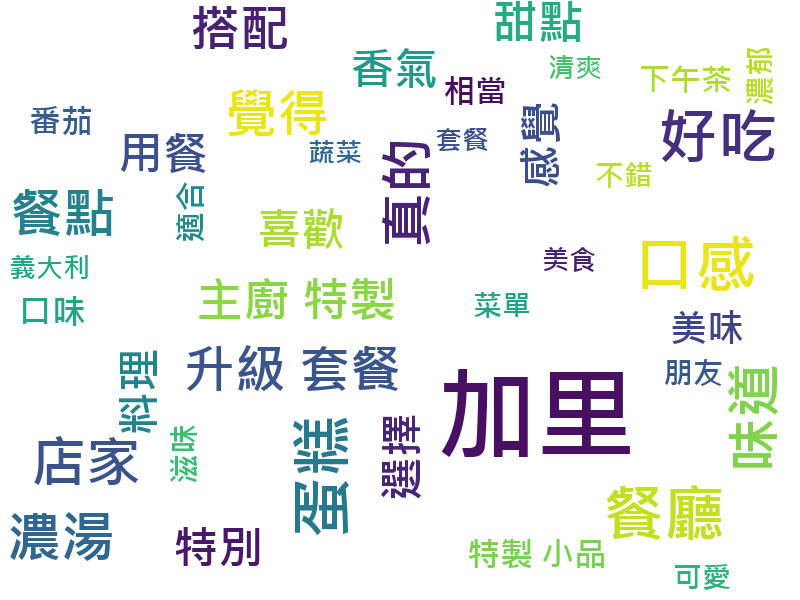

In [200]:
WC_Str=''
for i, x in enumerate(All_kmeans.labels_):
    if x == 0:
        WC_Str += ' '.join(All_List[i])

ww = WordCloud(max_font_size=100, relative_scaling=1,max_words=40,width=800, height=600,background_color='white',random_state=0,\
               stopwords=['記者','指出','報導','表示','台灣','今天','可以','一起','除了','自己'])\
               .generate(WC_Str)
ww.font_path = 'C:\Windows\Fonts\msjhbd' #微軟正黑體的路徑；字體可以自己設定，預設是英文的遇到中文會讀不出來
ww.to_image()
#ww.to_file('./pic/50gp_5.jpg') 可輸出圖檔

In [190]:
WC_Str

'騷烤 家 前鋒 總店   之前 住 日木 本來 騷烤 家 吃 晚餐 當天 組 部落 客約 約 喬喬 昨天 終於 阿熊 吃 騷烤 家 火車站 後 站 成 育樂 街 附近 不算 難 找常 火車站 附近 遊走 卻 鮮少 騎到 這區 騷烤 家 台南市 東區 前鋒 路號 定時 公休 先看 粉絲 專頁 公告 門口 高掛 紅燈籠 夜晚 放鬆 感覺 人數 吧台 區 簡單 吃個 炒飯 配 一兩樣 烤物 比較 特別 店 大大的 投影幕 播放 新聞 邊吃 燒烤 看電視 騷烤 家 沒什麼 裝潢 海安 路 路邊 出現 燒烤店 座位 分為 兩區 總共 多個 位置 兩區 搭 遮雨棚 下雨 影響 喔 這次 坐 比較 裡面 區域 燈光 比較 亮 感覺 比較 溫暖 些 聽說 騷烤 家 假日 人四是 人 比較 少 平日 九點 左右 人到 騷烤 家 小酌 一番 碗 杯子 櫃台 附近 自取 好好 放在 烘碗 機裡 灰塵 飲料 自取 清楚 貼 價格 冷藏櫃 上頭 清楚 寫上 騷烤 家 理念 老闆 說 大部分 店家 則是 炸過 再 紅外線 烤騷 烤家 堅持 木炭 鹽 烤 保留 食物 最佳 風味 酒 飲料 喝酒 喝開 喜 最爽 價位 表 餐點 醬 烤 油條 酥脆 豆皮 鹽 烤豬 肋排 酥脆 七里香 鹽 烤 甜不辣 酥脆 七里香 酥 炸 肥腸 農家 小炒 肉 鹹 酥 豬肝 鹽 烤 甜不辣 氣 酥脆 雞腿 蔬菜 雙拼 蒜頭 雞小 餐點 內容 乾 一杯 烏龍茶 餐點 就咻咻咻 上桌 之快 品味 烤 蛤 仔元 蛤蜊 新鮮肉 嫩 好像 海裡 撈 加入 米酒 蛤蜊 鮮美 外還 帶些 酒香 阿熊別 浪費 盒內 湯汁 喝 光光 農家 小炒 肉元騷 烤家 烤物 炒 老闆娘 來自 大陸 覺得 家鄉 吃 一道 覺得 美味 加入 菜單 肉嫩 炒 青 辣椒 香辣 開胃 辣度 需要 配 飲料 愛吃辣 朋友 點 一份 喔 蔬菜 雙拼 元 吃 燒烤 一定 要來 份 蔬菜 一份 青椒 香菇 組成 烤乾 保有 水份 香菇 吃水 嫩 水嫩 青椒 清脆 帶有 炭香及 芝麻 香刷 甜甜 鹹鹹的 醬汁 超級 清爽 好 入口 鹹 酥 豬肝 元 一份 老闆 推薦 阿熊 覺得 豬肝 太乾 覺得 粉粉 太 硬 鹹 酥 口味 適合 下酒菜 鹹 香入裡 涮 嘴 鹽 烤 甜不辣 元 一份 明明 普通 知道 好吃 意思 喜歡 外皮 脆 甜不辣 這份 外皮 焦脆 耶 中間